# Dimensionality Reduction

## PCA

3


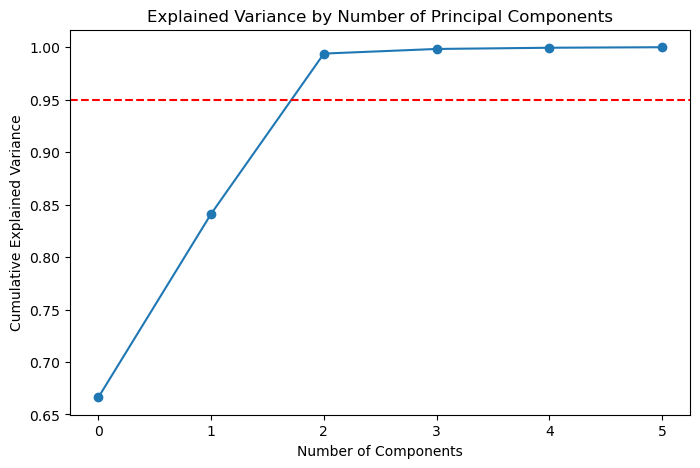

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

AAPL = pd.read_csv('AAPL_Cleaned.csv')

AAPL = AAPL.drop('timestamp', axis=1)
AAPL = AAPL.drop('Unnamed: 0', axis=1)
AAPL = AAPL.dropna()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(AAPL)

pca = PCA()
pca.fit(scaled_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(optimal_num_components)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()


The optimal components would be 2 as the first one explains 85%, the second one explains 15%, and adding more does not increase it significantly. 

## t-SNE

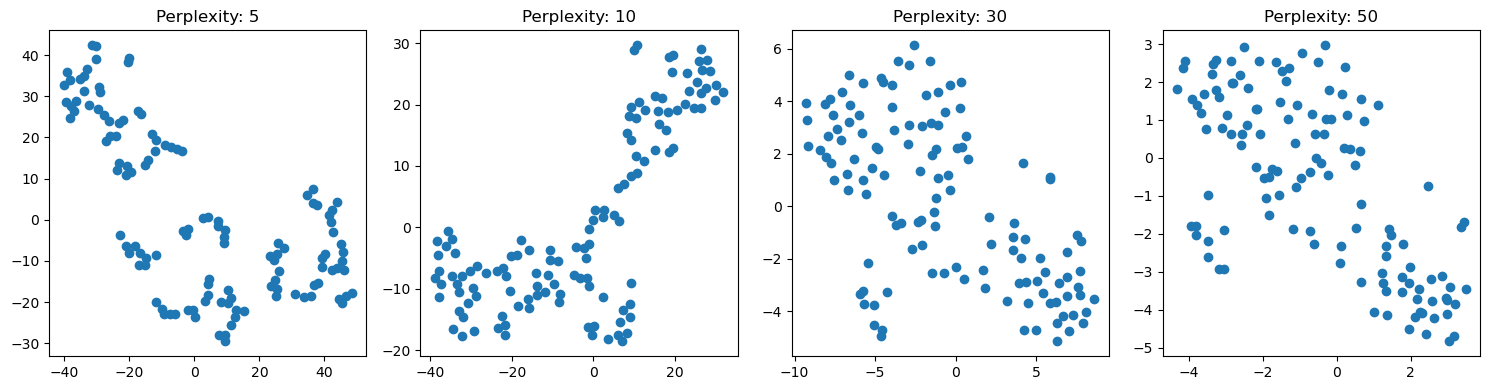

In [6]:
from sklearn.manifold import TSNE


perplexities = [5, 10, 30, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(15, 4))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(scaled_df)
    axes[i].scatter(tsne_result[:, 0], tsne_result[:, 1])
    axes[i].set_title(f'Perplexity: {perplexity}')
plt.tight_layout()
plt.show()

With the increase of perplexity, the points become more dense and the clusers are more clear.